<a href="https://colab.research.google.com/github/omerfarukyuce/stroke_prediction_machine_learning/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

# Load the Dataset

In [ ]:
df = pd.read_csv('stroke_prediction_dataset.csv')

# Understand And Organize the Dataset

In [ ]:
df.head()

Patient ID       Patient Name  ...                                           Symptoms  Diagnosis
0       18153    Mamooty Khurana  ...                      Difficulty Speaking, Headache     Stroke
1       62749  Kaira Subramaniam  ...    Loss of Balance, Headache, Dizziness, Confusion     Stroke
2       32145      Dhanush Balan  ...                                Seizures, Dizziness     Stroke
3        6154        Ivana Baral  ...  Seizures, Blurred Vision, Severe Fatigue, Head...  No Stroke
4       48973  Darshit Jayaraman  ...                                Difficulty Speaking     Stroke

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

Missing values

In [ ]:
df.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [ ]:
df = df.dropna(subset=['Symptoms'])

To remove only the nan values ​​in the Symptomns column we used "subset="

Since Patient ID and Patient Name cannot determine whether a person is stroke or not, we should drop them.

In [ ]:
df = df.drop(['Patient ID', 'Patient Name'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [ ]:
df.describe()

Age  Hypertension  ...  Stroke History  Stress Levels
count  12500.000000  12500.000000  ...    12500.000000   12500.000000
mean      53.992160      0.247200  ...        0.502000       5.019250
std       21.016848      0.431401  ...        0.500016       2.869672
min       18.000000      0.000000  ...        0.000000       0.000000
25%       36.000000      0.000000  ...        0.000000       2.530000
50%       54.000000      0.000000  ...        1.000000       5.040000
75%       72.000000      0.000000  ...        1.000000       7.510000
max       90.000000      1.000000  ...        1.000000      10.000000

[8 rows x 7 columns]

Divide the Cholesterol Levels and Blood Pressure Levels columns into Upper BP, Lower BP and HDL, LDL.

In [ ]:
df[['HDL', 'LDL']] = df["Cholesterol Levels"].str.split(",", expand=True)

In [ ]:
df.head(3)

Age Gender  Hypertension  ...  Diagnosis      HDL        LDL
0   56   Male             0  ...     Stroke  HDL: 68   LDL: 133
1   80   Male             0  ...     Stroke  HDL: 63    LDL: 70
2   26   Male             1  ...     Stroke  HDL: 59    LDL: 95

[3 rows x 22 columns]

In [ ]:
df['HDL'] = df['HDL'].str.split(':', expand=True)[1]
df['LDL'] = df['LDL'].str.split(':', expand=True)[1]

In [ ]:
df.head(3)

Age Gender  Hypertension  ...  Diagnosis  HDL   LDL
0   56   Male             0  ...     Stroke   68   133
1   80   Male             0  ...     Stroke   63    70
2   26   Male             1  ...     Stroke   59    95

[3 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [ ]:
df['HDL'] = pd.to_numeric(df['HDL'])
df['LDL'] = pd.to_numeric(df['LDL'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [ ]:
df['Upper BP'] = df['Blood Pressure Levels'].str.split('/',expand=True)[0]
df['Lower BP'] = df['Blood Pressure Levels'].str.split('/',expand=True)[1]

In [ ]:
df.head(3)

Age Gender  Hypertension  Heart Disease Marital Status  ... Diagnosis HDL  LDL  Upper BP Lower BP
0   56   Male             0              1        Married  ...    Stroke  68  133       140      108
1   80   Male             0              0         Single  ...    Stroke  63   70       146       91
2   26   Male             1              1        Married  ...    Stroke  59   95       154       97

[3 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [ ]:
df['Upper BP'] = pd.to_numeric(df['Upper BP'])
df['Lower BP'] = pd.to_numeric(df['Lower BP'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

Since we converted the separated values ​​into numerical values, we no longer need the Cholesterol and Blood Pressure Levels columns. Let's drop these columns.

In [ ]:
df = df.drop(['Blood Pressure Levels', 'Cholesterol Levels'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  object 
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  object 
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  object 
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  object 
 14  Dietary Hab

In [ ]:
df.describe()

Age  Hypertension  Heart Disease  ...           LDL      Upper BP      Lower BP
count  12500.000000  12500.000000   12500.000000  ...  12500.000000  12500.000000  12500.000000
mean      53.992160      0.247200       0.504320  ...    125.023520    135.084640     84.920960
std       21.016848      0.431401       0.500001  ...     37.673114     26.406053     14.716077
min       18.000000      0.000000       0.000000  ...     60.000000     90.000000     60.000000
25%       36.000000      0.000000       0.000000  ...     92.000000    112.000000     72.000000
50%       54.000000      0.000000       1.000000  ...    125.000000    135.000000     85.000000
75%       72.000000      0.000000       1.000000  ...    158.000000    158.000000     98.000000
max       90.000000      1.000000       1.000000  ...    190.000000    180.000000    110.000000

[8 rows x 11 columns]

# Preprocessing Categorical Columns

Label Encoding

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Diagnosis']= le.fit_transform(df['Diagnosis'])
df['Marital Status']= le.fit_transform(df['Marital Status'])
df['Residence Type']=le.fit_transform(df['Residence Type'])
df['Family History of Stroke']=le.fit_transform(df['Family History of Stroke'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  object 
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  object 
 10  Alcohol Intake            12500 non-null  object 
 11  Physical Activity         12500 non-null  object 
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

In [ ]:
df.describe()

Age        Gender  Hypertension  ...           LDL      Upper BP      Lower BP
count  12500.000000  12500.000000  12500.000000  ...  12500.000000  12500.000000  12500.000000
mean      53.992160      0.508880      0.247200  ...    125.023520    135.084640     84.920960
std       21.016848      0.499941      0.431401  ...     37.673114     26.406053     14.716077
min       18.000000      0.000000      0.000000  ...     60.000000     90.000000     60.000000
25%       36.000000      0.000000      0.000000  ...     92.000000    112.000000     72.000000
50%       54.000000      1.000000      0.000000  ...    125.000000    135.000000     85.000000
75%       72.000000      1.000000      0.000000  ...    158.000000    158.000000     98.000000
max       90.000000      1.000000      1.000000  ...    190.000000    180.000000    110.000000

[8 rows x 16 columns]

One Hot Encoding

In [ ]:
onehot = OneHotEncoder()
df['Smoking Status']=onehot.fit_transform(df[['Smoking Status']]).toarray()
df['Alcohol Intake']=onehot.fit_transform(df[['Alcohol Intake']]).toarray()
df['Physical Activity']=onehot.fit_transform(df[['Physical Activity']]).toarray()
df['Dietary Habits']=onehot.fit_transform(df[['Dietary Habits']]).toarray()
df['Work Type']=onehot.fit_transform(df[['Work Type']]).toarray()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  float64
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  float64
 10  Alcohol Intake            12500 non-null  float64
 11  Physical Activity         12500 non-null  float64
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

In [ ]:
df.describe()

Age        Gender  Hypertension  ...           LDL      Upper BP      Lower BP
count  12500.000000  12500.000000  12500.000000  ...  12500.000000  12500.000000  12500.000000
mean      53.992160      0.508880      0.247200  ...    125.023520    135.084640     84.920960
std       21.016848      0.499941      0.431401  ...     37.673114     26.406053     14.716077
min       18.000000      0.000000      0.000000  ...     60.000000     90.000000     60.000000
25%       36.000000      0.000000      0.000000  ...     92.000000    112.000000     72.000000
50%       54.000000      1.000000      0.000000  ...    125.000000    135.000000     85.000000
75%       72.000000      1.000000      0.000000  ...    158.000000    158.000000     98.000000
max       90.000000      1.000000      1.000000  ...    190.000000    180.000000    110.000000

[8 rows x 21 columns]

In [ ]:
df.head(3)

Age  Gender  Hypertension  Heart Disease  ...  HDL  LDL  Upper BP  Lower BP
0   56       1             0              1  ...   68  133       140       108
1   80       1             0              0  ...   63   70       146        91
2   26       1             1              1  ...   59   95       154        97

[3 rows x 22 columns]

Min Max Scaling

In [ ]:
scaler = MinMaxScaler()
df['Average Glucose Level'] = scaler.fit_transform(df[['Average Glucose Level']])
df['Body Mass Index (BMI)'] = scaler.fit_transform(df[['Body Mass Index (BMI)']])
df['Stress Levels'] = scaler.fit_transform(df[['Stress Levels']])
df['Lower BP'] = scaler.fit_transform(df[['Lower BP']])
df['Upper BP'] = scaler.fit_transform(df[['Upper BP']])
df['HDL'] = scaler.fit_transform(df[['HDL']])
df['LDL'] = scaler.fit_transform(df[['LDL']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  float64
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  float64
 10  Alcohol Intake            12500 non-null  float64
 11  Physical Activity         12500 non-null  float64
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

In [ ]:
df.describe()

Age        Gender  Hypertension  ...           LDL      Upper BP      Lower BP
count  12500.000000  12500.000000  12500.000000  ...  12500.000000  12500.000000  12500.000000
mean       0.330880      0.508880      0.247200  ...      0.258480      0.501925      0.501982
std        0.470549      0.499941      0.431401  ...      0.437817      0.286967      0.296137
min        0.000000      0.000000      0.000000  ...      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000  ...      0.000000      0.253000      0.240000
50%        0.000000      1.000000      0.000000  ...      0.000000      0.504000      0.500000
75%        1.000000      1.000000      0.000000  ...      1.000000      0.751000      0.760000
max        1.000000      1.000000      1.000000  ...      1.000000      1.000000      1.000000

[8 rows x 21 columns]

In [ ]:
df.head(3)

Age  Gender  Hypertension  Heart Disease  ...   HDL       LDL  Upper BP  Lower BP
0  0.527778       1             0              1  ...  0.76  0.561538  0.555556      0.96
1  0.861111       1             0              0  ...  0.66  0.076923  0.622222      0.62
2  0.111111       1             1              1  ...  0.58  0.269231  0.711111      0.74

[3 rows x 22 columns]

## Editing Symptoms Column

Edit the Symptoms column, whose data type is object.

Download stopwords using nltk library.

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Preprocessing Symptoms

In [ ]:
def preprocess_symptoms(symptoms):
    symptom_list = [symptom.strip() for symptom in symptoms.split(',')]


    cleaned_symptoms = []
    for symptom in symptom_list:
        words = [word.lower() for word in symptom.split() if word.lower() not in stop_words]
        cleaned_symptom = '_'.join(words)
        cleaned_symptoms.append(cleaned_symptom)

    return ', '.join(cleaned_symptoms)

In [ ]:
df['Cleaned_Symptoms'] = df['Symptoms'].apply(preprocess_symptoms)

In [ ]:
df.head(3)

Age  Gender  Hypertension  ...  Upper BP  Lower BP                              Cleaned_Symptoms
0  0.527778       1             0  ...  0.555556      0.96                 difficulty_speaking, headache
1  0.861111       1             0  ...  0.622222      0.62  loss_balance, headache, dizziness, confusion
2  0.111111       1             1  ...  0.711111      0.74                           seizures, dizziness

[3 rows x 23 columns]

Use Count Vectorizer And TF IDF Vectorizer

In [ ]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['Cleaned_Symptoms'])

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Symptoms'])

In [ ]:
print("Top 5 Examples of Original Symptoms:")
print(df['Symptoms'].head())
print("\nTop 5 Examples of Cleaned Symptoms:")
print(df['Cleaned_Symptoms'].head())

# CountVectorizer feature names (show terms)
print("\nCount Vectorizer Terms:")
print(count_vectorizer.get_feature_names_out())

# TF-IDF feature names
print("\nTF-IDF Vectorizer Terms:")
print(tfidf_vectorizer.get_feature_names_out())

Top 5 Examples of Original Symptoms:
0                        Difficulty Speaking, Headache
1      Loss of Balance, Headache, Dizziness, Confusion
2                                  Seizures, Dizziness
3    Seizures, Blurred Vision, Severe Fatigue, Head...
4                                  Difficulty Speaking
Name: Symptoms, dtype: object

Top 5 Examples of Cleaned Symptoms:
0                        difficulty_speaking, headache
1         loss_balance, headache, dizziness, confusion
2                                  seizures, dizziness
3    seizures, blurred_vision, severe_fatigue, head...
4                                  difficulty_speaking
Name: Cleaned_Symptoms, dtype: object

Count Vectorizer Terms:
['blurred_vision' 'confusion' 'difficulty_speaking' 'dizziness' 'headache'
 'loss_balance' 'numbness' 'seizures' 'severe_fatigue' 'weakness']

TF-IDF Vectorizer Terms:
['blurred_vision' 'confusion' 'difficulty_speaking' 'dizziness' 'headache'
 'loss_balance' 'numbness' 'seizures' 's

In [ ]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.70866127, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.50179493, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70897913, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.57667586, ..., 0.        , 0.58120962,
        0.        ],
       [0.        , 0.44734532, 0.        , ..., 0.        , 0.45115496,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
count_matrix.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  float64
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  float64
 10  Alcohol Intake            12500 non-null  float64
 11  Physical Activity         12500 non-null  float64
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

We no longer need the Cleaned_Symptoms and Symptoms columns, let's drop them.

In [ ]:
df = df.drop(['Symptoms', 'Cleaned_Symptoms'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Gender                    12500 non-null  int64  
 2   Hypertension              12500 non-null  int64  
 3   Heart Disease             12500 non-null  int64  
 4   Marital Status            12500 non-null  int64  
 5   Work Type                 12500 non-null  float64
 6   Residence Type            12500 non-null  int64  
 7   Average Glucose Level     12500 non-null  float64
 8   Body Mass Index (BMI)     12500 non-null  float64
 9   Smoking Status            12500 non-null  float64
 10  Alcohol Intake            12500 non-null  float64
 11  Physical Activity         12500 non-null  float64
 12  Stroke History            12500 non-null  int64  
 13  Family History of Stroke  12500 non-null  int64  
 14  Dietary Hab

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix .toarray(), columns=tfidf_vectorizer.get_feature_names_out())
new_tfidf_df = pd.concat([df, tfidf_df], axis=1)
new_tfidf_df.dropna(inplace=True)
new_tfidf_df.head()

Age  Gender  Hypertension  Heart Disease  ...  numbness  seizures  severe_fatigue  weakness
0  0.527778     1.0           0.0            1.0  ...       0.0  0.000000        0.000000       0.0
1  0.861111     1.0           0.0            0.0  ...       0.0  0.000000        0.000000       0.0
2  0.111111     1.0           1.0            1.0  ...       0.0  0.708979        0.000000       0.0
3  0.763889     1.0           0.0            0.0  ...       0.0  0.446784        0.450413       0.0
4  0.458333     1.0           1.0            1.0  ...       0.0  0.000000        0.000000       0.0

[5 rows x 31 columns]

In [ ]:
count_df = pd.DataFrame(count_matrix .toarray(), columns=count_vectorizer.get_feature_names_out())
new_count_df = pd.concat([df, count_df], axis=1)
new_count_df.dropna(inplace=True)
new_count_df.head()

Age  Gender  Hypertension  Heart Disease  ...  numbness  seizures  severe_fatigue  weakness
0  0.527778     1.0           0.0            1.0  ...       0.0       0.0             0.0       0.0
1  0.861111     1.0           0.0            0.0  ...       0.0       0.0             0.0       0.0
2  0.111111     1.0           1.0            1.0  ...       0.0       1.0             0.0       0.0
3  0.763889     1.0           0.0            0.0  ...       0.0       1.0             1.0       0.0
4  0.458333     1.0           1.0            1.0  ...       0.0       0.0             0.0       0.0

[5 rows x 31 columns]

# Models Building

In [ ]:
new_tfidf_df.info()
new_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10433 entries, 0 to 12499
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10433 non-null  float64
 1   Gender                    10433 non-null  float64
 2   Hypertension              10433 non-null  float64
 3   Heart Disease             10433 non-null  float64
 4   Marital Status            10433 non-null  float64
 5   Work Type                 10433 non-null  float64
 6   Residence Type            10433 non-null  float64
 7   Average Glucose Level     10433 non-null  float64
 8   Body Mass Index (BMI)     10433 non-null  float64
 9   Smoking Status            10433 non-null  float64
 10  Alcohol Intake            10433 non-null  float64
 11  Physical Activity         10433 non-null  float64
 12  Stroke History            10433 non-null  float64
 13  Family History of Stroke  10433 non-null  float64
 14  Dietary Hab

Declare x1 and y1 variables with tf idf vectorizer and x2 and y2 values ​​with count vectorizer.

In [ ]:
x1 = new_tfidf_df.drop('Diagnosis', axis=1)
y1 = new_tfidf_df['Diagnosis']

x2 = new_count_df.drop('Diagnosis', axis=1)
y2 = new_count_df['Diagnosis']

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

Decission tree classifier with tf idf vectorizer:

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.80, random_state=42)
tree = DecisionTreeClassifier()
model_tree = tree.fit(x1_train, y1_train)

y1_pred = model_tree.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y1_test, y1_pred))

Accuracy: 51.51%
              precision    recall  f1-score   support

         0.0       0.52      0.49      0.51      1050
         1.0       0.51      0.54      0.52      1037

    accuracy                           0.52      2087
   macro avg       0.52      0.52      0.51      2087
weighted avg       0.52      0.52      0.51      2087



Decission tree classifier with count vectorizer:

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.80, random_state=42)
tree = DecisionTreeClassifier()
model_tree = tree.fit(x2_train, y2_train)

y2_pred = model_tree.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y2_test, y2_pred))

Accuracy: 52.37%
              precision    recall  f1-score   support

         0.0       0.53      0.54      0.53      1050
         1.0       0.52      0.51      0.52      1037

    accuracy                           0.52      2087
   macro avg       0.52      0.52      0.52      2087
weighted avg       0.52      0.52      0.52      2087



Visualize the decision tree classifier stages.

In [ ]:
dot = export_graphviz(model_tree, feature_names=x2.columns, filled=True)
graph = graphviz.Source(dot)
graph

Random forest classifier with tf idf vectorizer:

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=42)
forest = RandomForestClassifier(n_estimators=400, max_depth=4, random_state=42)
model_forest = forest.fit(x1_train, y1_train)

y1_pred = model_forest.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y1_test, y1_pred))

Accuracy: 52.01%
              precision    recall  f1-score   support

         0.0       0.52      0.60      0.55      1565
         1.0       0.52      0.44      0.48      1565

    accuracy                           0.52      3130
   macro avg       0.52      0.52      0.52      3130
weighted avg       0.52      0.52      0.52      3130



Random forest classifier with count vectorizer:

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.70, random_state=42)
forest = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=42)
model_forest = forest.fit(x2_train, y2_train)

y2_pred = model_forest.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y2_test, y2_pred))

Accuracy: 50.96%
              precision    recall  f1-score   support

         0.0       0.51      0.63      0.56      1565
         1.0       0.51      0.39      0.44      1565

    accuracy                           0.51      3130
   macro avg       0.51      0.51      0.50      3130
weighted avg       0.51      0.51      0.50      3130



XGBoost with tf idf vectorizer:

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=42)
boost = xgb.XGBClassifier()
model_boost = boost.fit(x1_train, y1_train)

y1_pred = model_boost.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y1_test, y1_pred))

Accuracy: 52.33%
              precision    recall  f1-score   support

         0.0       0.52      0.54      0.53      1565
         1.0       0.52      0.51      0.52      1565

    accuracy                           0.52      3130
   macro avg       0.52      0.52      0.52      3130
weighted avg       0.52      0.52      0.52      3130



XGBoost with count vectorizer:

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.70, random_state=45)
boost = xgb.XGBClassifier()
model_boost = boost.fit(x2_train, y2_train)

y2_pred = model_boost.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y2_test, y2_pred))

Accuracy: 51.53%
              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52      1563
         1.0       0.52      0.50      0.51      1567

    accuracy                           0.52      3130
   macro avg       0.52      0.52      0.52      3130
weighted avg       0.52      0.52      0.52      3130



Logistic Regression with tf idf vectorizer:

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=45)
log = LogisticRegression()
model_log = log.fit(x1_train, y1_train)

y1_pred = model_log.predict(x1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y1_test, y1_pred))

Accuracy: 50.99%
              precision    recall  f1-score   support

         0.0       0.51      0.57      0.54      1563
         1.0       0.51      0.45      0.48      1567

    accuracy                           0.51      3130
   macro avg       0.51      0.51      0.51      3130
weighted avg       0.51      0.51      0.51      3130



Logistic Regression with count vectorizer:

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.70, random_state=20)
log = LogisticRegression()
model_log = log.fit(x2_train, y2_train)

y2_pred = model_log.predict(x2_test)
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y2_test, y2_pred))

Accuracy: 51.09%
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51      1583
         1.0       0.51      0.52      0.51      1547

    accuracy                           0.51      3130
   macro avg       0.51      0.51      0.51      3130
weighted avg       0.51      0.51      0.51      3130



# Confusion Matrix

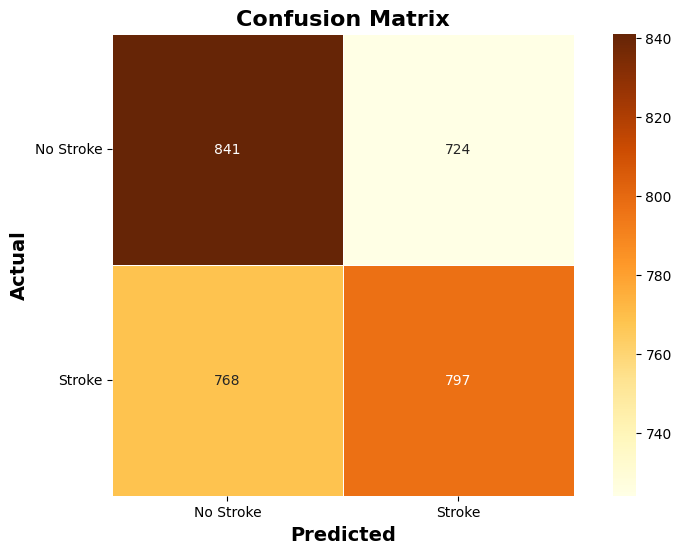

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Let's draw the confusion matrix according to the highest accuracy, that is, according to xgboost

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.70, random_state=42)
boost = xgb.XGBClassifier()
model_boost = boost.fit(x1_train, y1_train)

y1_pred = model_boost.predict(x1_test)

cm = confusion_matrix(y1_test, y1_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap="YlOrBr", linewidths=0.4, square=True, cbar=True,
    xticklabels=["No Stroke", "Stroke"],
    yticklabels=["No Stroke", "Stroke"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

# Create the heat map of the correlation

In [ ]:
new_count_df = new_count_df.reindex(columns=['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Stroke History', 'Family History of Stroke', 'Dietary Habits',
       'Stress Levels', 'HDL', 'LDL', 'Upper BP', 'Lower BP', 'blurred_vision',	'confusion',
       'difficulty_speaking',	'dizziness',	'headache',	'loss_balance',	'numbness',	'seizures',
       'severe_fatigue',	'weakness', 'Diagnosis'])

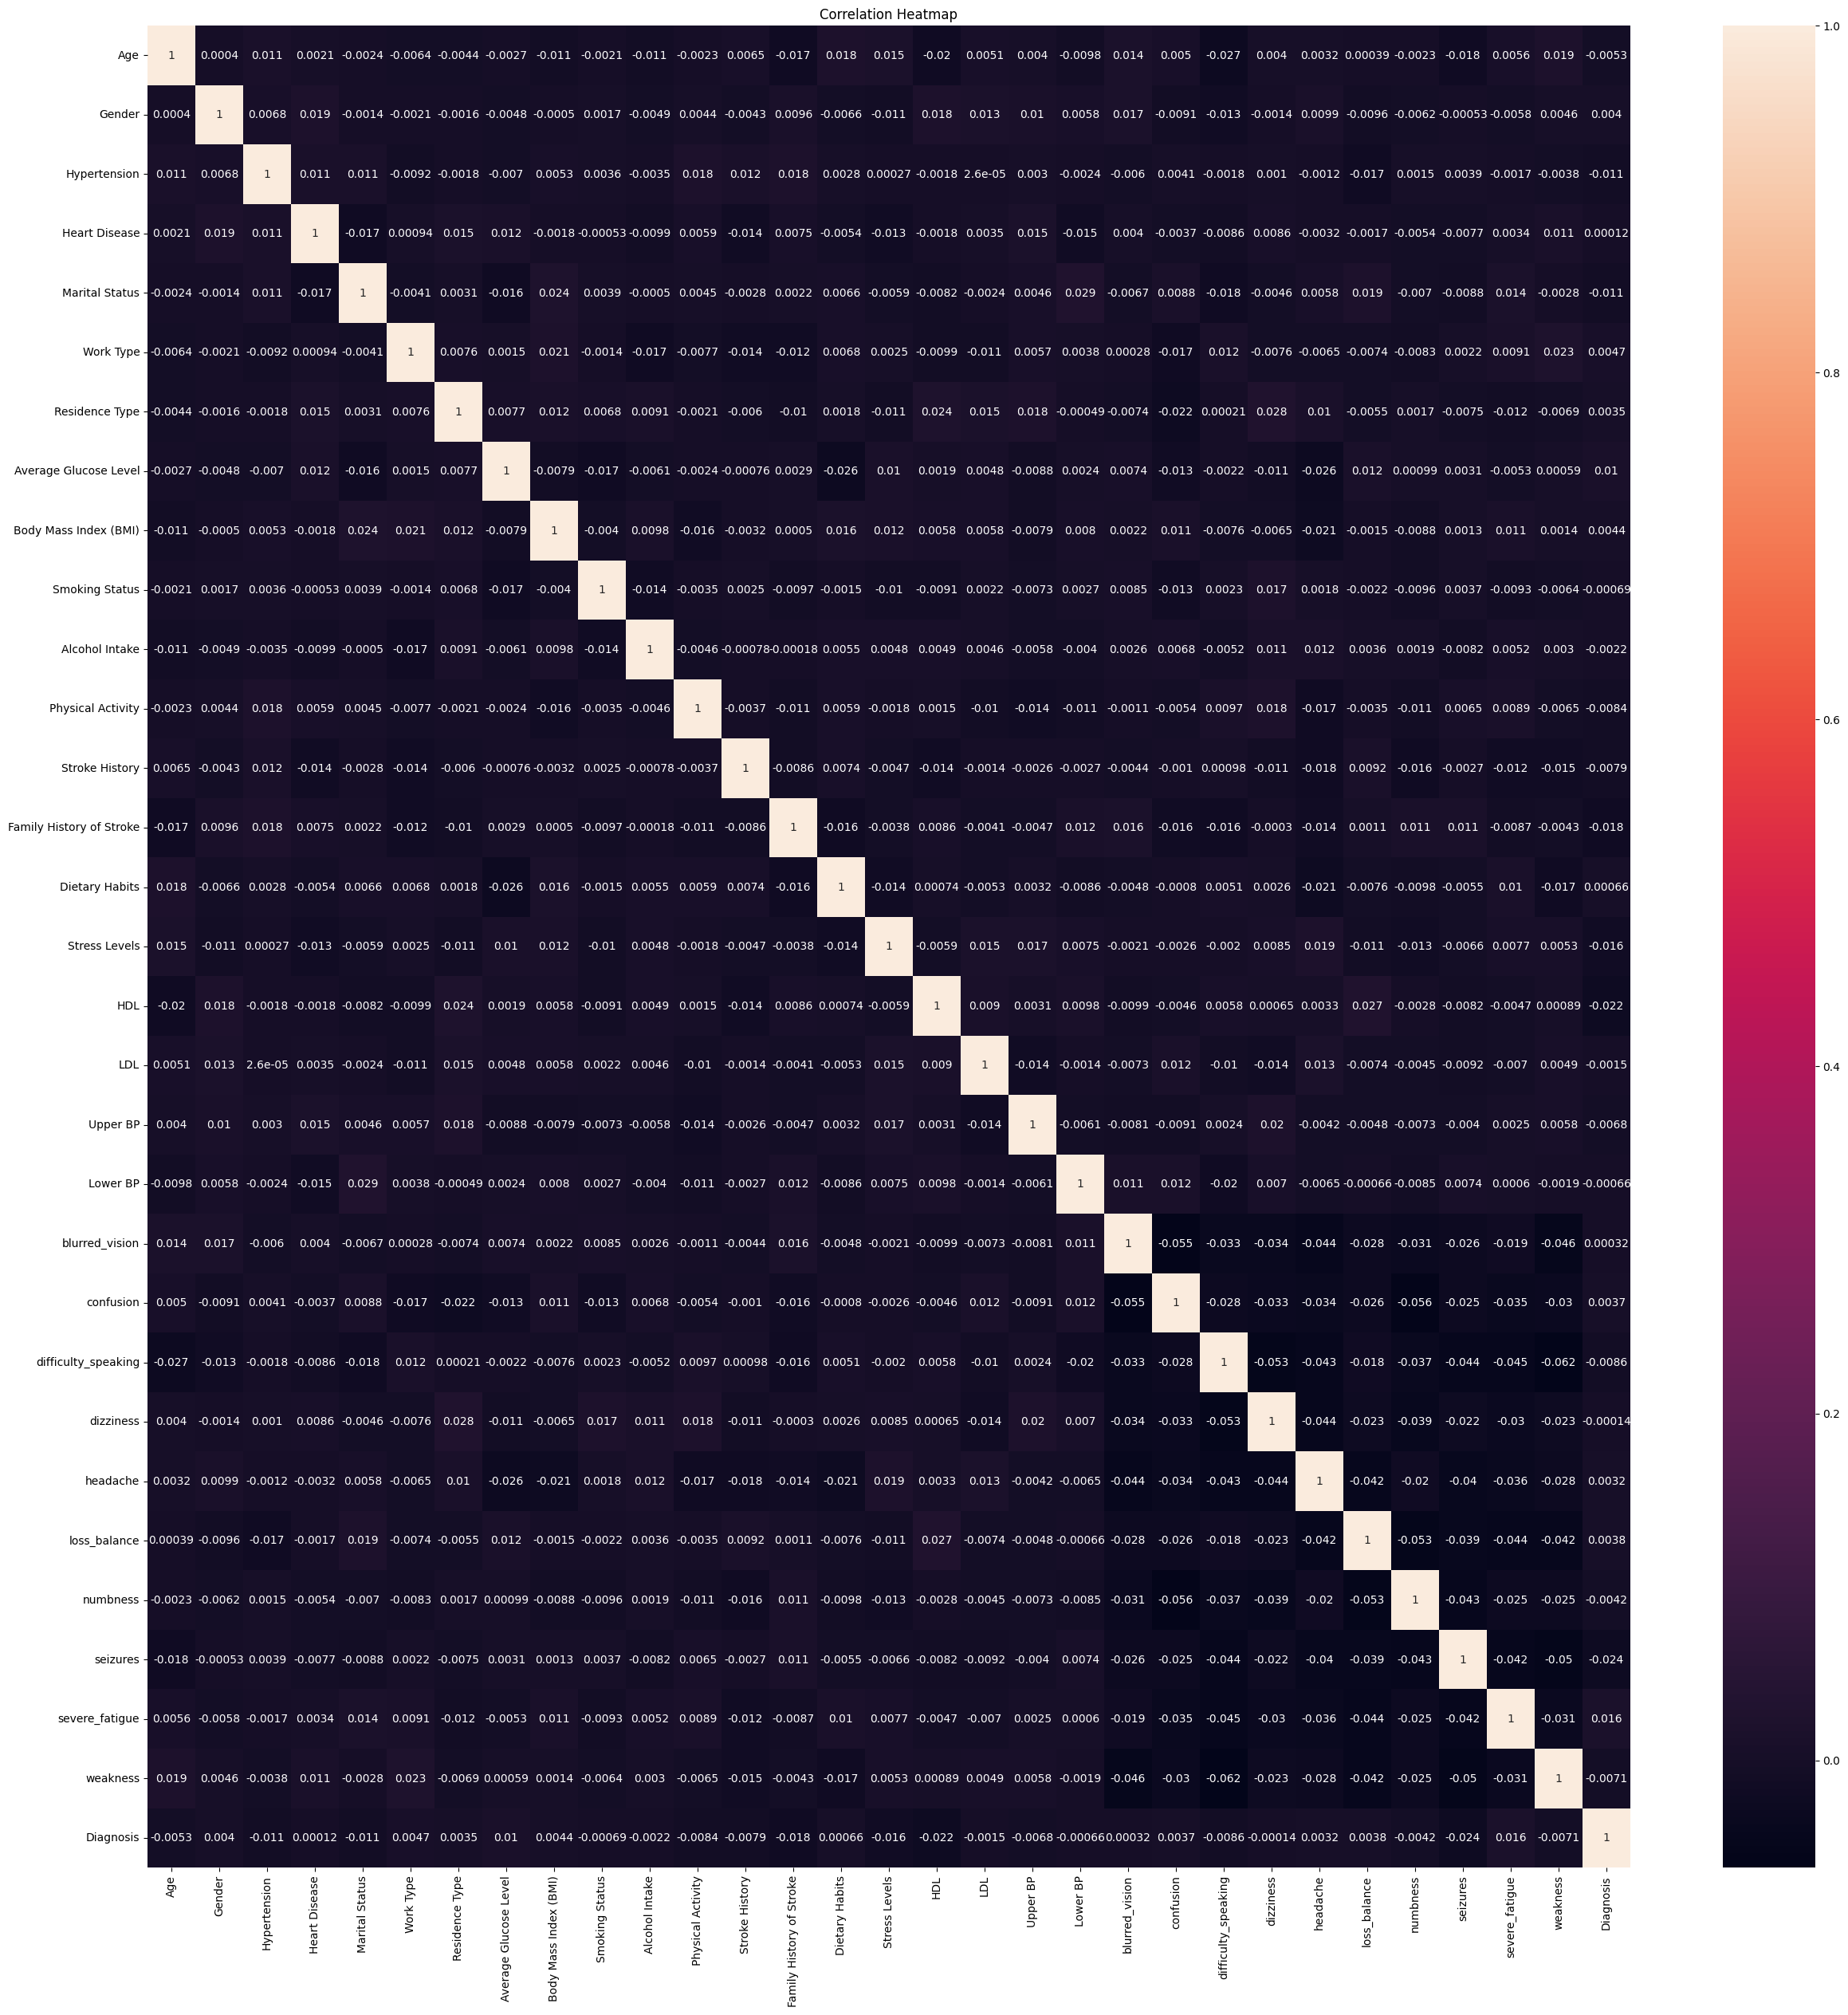

In [ ]:
new_count_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(new_count_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Conclusion

This study aimed to develop and evaluate machine learning models for stroke prediction. As a result of the data set used and the methods applied, an average success rate of 52% was achieved. This reveals both the limitations of the data set and the complexity of stroke prediction. It is aimed to achieve higher success rates in the future with more comprehensive data sets and advanced modeling methods.